## American Global Telecommunication Consumers Complaints Data

 
### DESCRIPTION

 - Comcast is an American global telecommunication company. The firm has been providing terrible customer service. 
 - They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them 2.3 - million dollars, 
 - after receiving over 1000 consumer complaints. The existing database will serve as a repository of public - customer complaints filed against 
 - Comcast.It will help to pin down what is wrong with Comcast's customer service.

### Data Dictionary

- Ticket #: Ticket number assigned to each complaint
- Customer Complaint: Description of complaint
- Date: Date of complaint
- Time: Time of complaint
- Received Via: Mode of communication of the complaint
- City: Customer city
- State: Customer state
- Zipcode: Customer zip
- Status: Status of complaint
- Filing on behalf of someone

### Analysis Task

- Import data into Python environment.

- Provide the trend chart for the number of complaints at monthly and daily granularity levels.

- Provide a table with the frequency of complaint types. - Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. 
- Provide insights on:
 Which state has the maximum complaints 
 Which state has the highest percentage of unresolved complaints

- Provide the percentage of complaints resolved to date, which were received through theInternet and customer care calls.
- The analysis results to be provided with insights wherever applicable

In [6]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
df = pd.read_csv("C:/Users/ejhajee/Downloads/Comcast Telecom Complaints data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 173.9+ KB


In [9]:
df[df.isnull()].count()
#No Nulls

Ticket #                       0
Customer Complaint             0
Date                           0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [10]:
df.describe(include='all')

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,2190,2,928,43,NaN,4,2
top,305301,Comcast,24-06-2015,2:06:03 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


### EDA and Cleanup the data set

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 173.9+ KB


In [12]:
df['Date']

0       22-04-2015
1         4/8/2015
2       18-04-2015
3         5/7/2015
4       26-05-2015
           ...    
2219      4/2/2015
2220      6/2/2015
2221      6/9/2015
2222    23-06-2015
2223    24-06-2015
Name: Date, Length: 2224, dtype: object

### TASK 1 - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [13]:
df['Date_month_year'] = pd.to_datetime(df['Date'])
df['Created_Month'] =  df['Date_month_year'].apply(lambda x: x.month)
df['Created_Day'] = df['Date_month_year'].apply(lambda x: x.day)
df['Created_Day of Week'] = df['Date_month_year'].apply(lambda x: x.dayofweek)

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df['Created_Day of Week']=df['Created_Day of Week'].map(dmap)
df.head(5)

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_month_year,Created_Month,Created_Day,Created_Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4,22,Wed
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-04-08,4,8,Wed
2,242732,Speed and Service,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,4,18,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-05-07,5,7,Thur
4,307175,Comcast not working and no service to boot,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,5,26,Tue


Text(0.8, 0.85, 'Max complaints in Jun')

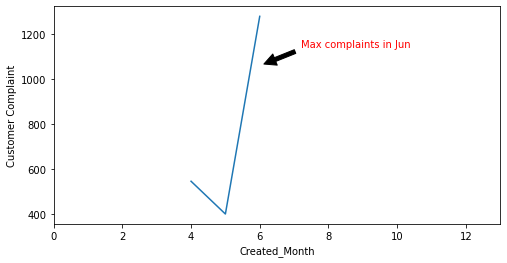

In [15]:
#number of complaints monthly
plt.figure(figsize=(8,4))
bymonth = df.groupby('Created_Month').count().reset_index()
lp = sns.lineplot(x='Created_Month', y= 'Customer Complaint', data = bymonth, sort=False,markers = "o")
ax = lp.axes
ax.set_xlim(0,13)
ax.annotate('Max complaints in Jun', color='red',
            xy=(6, 1060), xycoords='data',
            xytext=(0.8, 0.85), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.1),
            horizontalalignment='right', verticalalignment='top')

(0.0, 32.0)

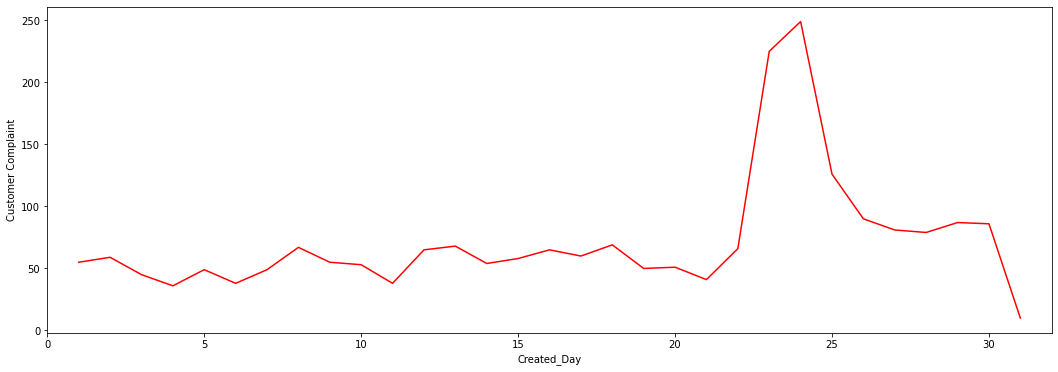

In [16]:
#number of complaints Daily
plt.figure(figsize=(18,6))
byday = df.groupby('Created_Day').count().reset_index()
lp = sns.lineplot(x='Created_Day', y= 'Customer Complaint', data = byday, sort=False, color = 'red',markers = "o", )
ax = lp.axes
ax.set_xlim(0,32)

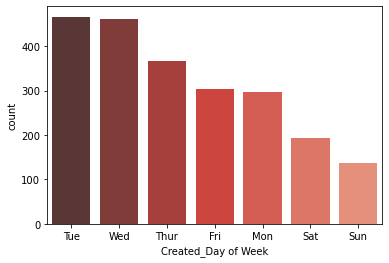

In [17]:
# Number of complaints based on created day of the week
sns.countplot(x='Created_Day of Week', data = df, order=df['Created_Day of Week'].value_counts().index, palette ="Reds_d")
# More number of complaints on Tuesday and wednesday

### TASK 2 - Provide a table with the frequency of complaint types.

In [18]:
df['Customer Complaint'] = df['Customer Complaint'].str.title() 
CT_freq = df['Customer Complaint'].value_counts()
CT_freq

Comcast                                                               102
Comcast Data Cap                                                       30
Comcast Internet                                                       29
Comcast Data Caps                                                      21
Comcast Billing                                                        18
                                                                     ... 
The Monthly Bill For My Internet Service Has Become Too Expensive.      1
Comcast Internet Services And Customer Service Is Horrible              1
Comcast Slamming With Fees                                              1
Comcast Wont Honor Discount, Bill Higher Than What Was Agreed           1
Comcast Blocking Services                                               1
Name: Customer Complaint, Length: 1740, dtype: int64

In [19]:
import nltk
#%pip install wordcloud

In [20]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = df['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)

In [21]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

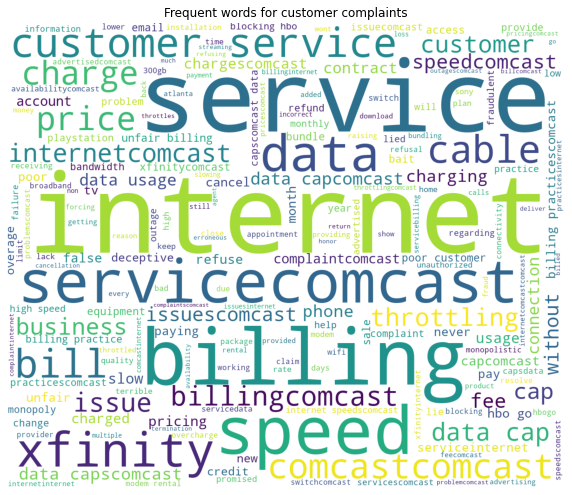

In [22]:
plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()
#Internet complaints are Maximum

In [23]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [24]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ejhajee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [26]:
doc_complete = df['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [27]:
#%pip install gensim
from gensim import corpora

In [28]:
dictionary = corpora.Dictionary(doc_clean)
dictionary

In [29]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [30]:
from gensim.models import LdaModel
from sklearn.decomposition import LatentDirichletAllocation

In [43]:
num_topic = 9
#ldamodel=LatentDirichletAllocation(n_components=num_topic, random_state=1)
#ldamodel.fit(doc_term_matrix,y=None)
ldamodel = LdaModel(doc_term_matrix,num_topics=num_topic,id2word = dictionary,passes=10)

In [44]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.198*"service" + 0.120*"comcast" + 0.091*"internet" + 0.020*"paying" + 0.019*"customer" + 0.018*"day" + 0.017*"poor" + 0.014*"outage" + 0.013*"failure" + 0.013*"show"')

(1, '0.105*"comcast" + 0.061*"pricing" + 0.058*"internet" + 0.031*"pay" + 0.023*"bill" + 0.023*"connection" + 0.023*"charging" + 0.021*"unfair" + 0.020*"broadband" + 0.019*"unreliable"')

(2, '0.174*"issue" + 0.055*"billing" + 0.026*"installation" + 0.023*"signal" + 0.023*"monopolistic" + 0.021*"option" + 0.019*"throttled" + 0.019*"lied" + 0.018*"one" + 0.015*"scam"')

(3, '0.161*"comcast" + 0.150*"billing" + 0.066*"service" + 0.053*"practice" + 0.040*"xfinity" + 0.031*"unfair" + 0.021*"bill" + 0.019*"deceptive" + 0.015*"fraudulent" + 0.013*"credit"')

(4, '0.052*"internet" + 0.043*"customer" + 0.041*"service" + 0.031*"lack" + 0.025*"intermittent" + 0.024*"phone" + 0.023*"connectivity" + 0.021*"several" + 0.020*"time" + 0.018*"comcast"')

(5, '0.131*"comcast" + 0.103*"charge" + 0.041*"service" + 0.029*"help" + 0.

In [1]:
#pd.DataFrame(word_dict)

In [45]:
word_dict = {}
for i in range(num_topic):
    words = ldamodel.show_topic(i,topn = 20)
    word_dict['Topic '+"{}".format(i)]=[i[0] for i in words]

In [46]:
pd.DataFrame(word_dict)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,service,comcast,issue,comcast,internet,comcast,comcast,internet,comcast
1,comcast,pricing,billing,billing,customer,charge,without,speed,data
2,internet,internet,installation,service,service,service,charged,slow,cap
3,paying,pay,signal,practice,lack,help,contract,throttling,internet
4,customer,bill,monopolistic,xfinity,intermittent,cramming,equipment,price,complaint
5,day,connection,option,unfair,phone,complaint,fee,service,usage
6,poor,charging,throttled,bill,connectivity,account,refund,false,problem
7,outage,unfair,lied,deceptive,several,please,promised,bill,comcastxfinity
8,failure,broadband,one,fraudulent,time,2,service,switch,cable
9,show,unreliable,scam,credit,comcast,monopoly,year,high,limit


In [47]:
import pyLDAvis.gensim
#%pip install pyLDAvis

In [48]:
Lda_display = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary,sort_topics=False)
pyLDAvis.display(Lda_display)

### TASK 3 - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [38]:
df['Highlevel_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [39]:
df['Highlevel_Status'].unique()

array(['Closed', 'Open'], dtype=object)

### TASK 4 - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [40]:
df['State'] = df['State'].str.title() 
st_cmp = df.groupby(['State','Highlevel_Status']).size().unstack().fillna(0)

In [41]:
st_cmp

Highlevel_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


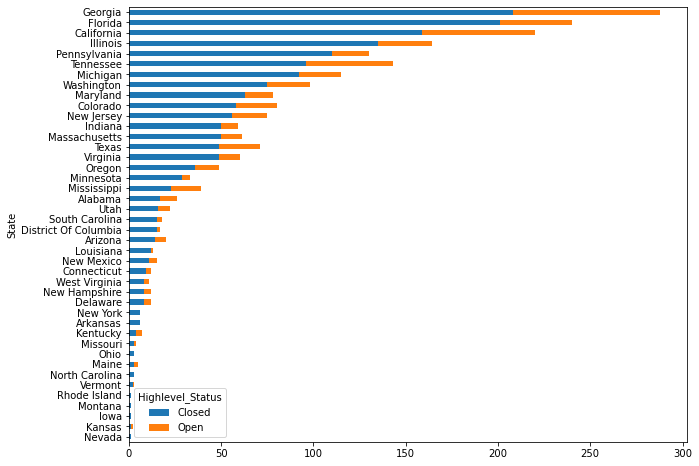

In [43]:
st_cmp.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(10,8), stacked=True)

### TASK 5 - Which state has the maximum complaints Which state has the highest percentage of unresolved complaints

In [44]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]
#Georgia has highest complaints

,Complaint count
State,
Georgia,288


In [46]:
CT = df.groupby(["State","Highlevel_Status"]).size().unstack().fillna(0)
CT.sort_values('Closed',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open
State,,
Georgia,208.0,80.0


In [47]:
# Highest percentage of unresolved complaints
CT['Resolved_cmp_prct'] = CT['Closed']/CT['Closed'].sum()*100
CT['Unresolved_cmp_prct'] = CT['Open']/CT['Open'].sum()*100

In [48]:
CT.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:1]
# Georgia state has highest Unresolved complaints when compared to othe

Highlevel_Status,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Georgia,208.0,80.0,12.18512,15.473888


### TASK 6 --- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [49]:
cr = df.groupby(['Received Via','Highlevel_Status']).size().unstack().fillna(0)
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64